# NLP-sentiment_analysis & WordClouds in Song Lyrics with Python

### BY

### MAKRIS DIMITRIS

## INTRODUCTION

In [9]:
# Loading all necessary libraries

import collections   
import pandas as pd   
import matplotlib.pyplot as plt   
%matplotlib inline
from PIL import Image
from wordcloud import WordCloud
import nltk
nltk.download(["stopwords","vader_lexicon","punkt","wordnet"])
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from numpy import asarray


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\domna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\domna\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\domna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\domna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


import base64
import requests

master = "https://raw.githubusercontent.com/hippoghost/testrepo/master/testnote.txt"
req = requests.get(master)
req = req.text
print(req)

import base64
import requests

master = "https://raw.githubusercontent.com/hippoghost/testrepo/master/testnote.txt"
a = requests.get(master)
a = req.text
print(a)

In [15]:
import urllib
import base64
import requests

master = "https://raw.githubusercontent.com/https://github.com/hippoghost/NLP-sentiment_analysis-WordCloud-python/blob/master/datasets/datasets/lyrics.txt"
req = requests.get(master)
req = req.text
print(req)

404: Not Found


In [101]:
#Importing dataset

#file = open('C:/Users/domna/Desktop/GITHUB/python_NLP/albumstxt/full.txt', encoding="utf8")   
file = open('C:/Users/EFKA-PC/Desktop/github1/python_NLP/albumstxt/full.txt', encoding="utf8")   
a= file.read()
a

"SPIT\n\n\nThere must be something\nThat you want to do again today\nDon’t say nothing\nMaybe silence gives a better way\n\nI know you come from the damned\nYou give too much to pretend\nYou don’t know what life’s about\nGo spit on some other ground\n\nDon’t have to worry\nAbout the problems that you never had\nRunning with yourself\nAnd always win the second the second the prize\n\nI know you come from the damned\nYou give too much to pretend\nYou don’t know what life’s about\nGo spit on some other ground\n\nLeave me alone\nI don’t wanna hear you any more\nAnd when you leave\nPlease take the garbage out the door\n\nI know you come from the damned\nYou give too much to pretend\nYou don’t know what life’s about\nGo spit on some other ground\n\n\n\n\nWHAT YOUR NAME IS\n\n\nHow happy you must be right now\nthat you gave a birth to these little gentle creatures\nI don’t know how you managed to do this,\nbut I tell you why it looks so evil\nCause I don’t know what you mean\nabout the world 

In [102]:
len(a)

35946

In [103]:
# Creating stopword list from nlkt
stop_words = stopwords.words('english')

In [104]:
#reviewing stop_words
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [105]:
#reviewing length of stopword
print(len(stop_words))

179


## ADD STOPWORDS AFTER SOME TESTS

In [ ]:
#extending stopword list
stop_words.extend(['or', 'm', 'ma', 'ours', 'against', 'nor', "it's", 'o', 'wasn', 'hasn', 'my', 'had',  'isn', 
                   'did',  'those', 'than', "mustn't", "you've", 'to', 'she', 'having', "haven't", 'into', 't', 
                   'll', 'himself', 'do', "that'll", 'so', 'of', 'on', 'very', 'for', 'out', 'were', 'should', 'they', 
                   'ain', "should've", 'you',  'yours', 'was', 'our', 'can', 'myself', "shouldn't", 'have', 'up', 
                   'mightn', "you'll", 'any', 'itself', 'hadn', 'him', 'doesn', 'weren', 'y', 'being', 'them', 'are',
                   'and', 'that', 'your', 'yourself', 'their', 'some', 'ourselves', 've', 'doing', 'been', 'shouldn', 
                   'yourselves', "mightn't", 'most', 'because', 'wouldn', "you'd", 'through', "you're", 'themselves', 
                   'an', 'if',  'its', 'other', "won't", "wasn't", "she's", 'we', 'didn','few','mustn', "hadn't",'don',
                   'shan', "weren't", "wouldn't","didn't",'aren','all', "hasn't", "doesn't", "don't",
                   'this', 'off', 'while', 'a', 'haven', 'her', 'theirs',  'about', 'then', 'by',
                   'such', 'but', 'until', 'each', 'there', "aren't", 'with', 'not', "shan't", 'hers', 'it', 'too', 'i', 'at', 
                   'is', 'as', 'me', 'herself', 's', 'the', 'where', 'am', 'has', 'over', "couldn't", 'when', 'does', 
                   're', 'no', 'in', 'who', 'd', 'own', 'he', 'be', "isn't", 'his', 'these', 'same', 'whom', 'will', 'needn',
                   'couldn', 'from','i’m']) 


In [106]:
#reviewing length of extended stopword list
len(stop_words)

179

In [107]:
#type of raw text
type(a)

str

In [108]:
#creating function that tokenizes text, lowers letters and removes punctuation, disgarding words included in stopword list
def preprocess_text(text):
    # Tokenise words while ignoring punctuation
    tokeniser = RegexpTokenizer(r'\w+')
    tokens = tokeniser.tokenize(text)
    
    data_token=[token.lower() for token in tokens]
    processed_words= [w for w in data_token if not w in stop_words]
    return processed_words

In [109]:
#saving normalized text in new variable cleaned_text
cleaned_text=preprocess_text(a)
cleaned_text

['spit',
 'must',
 'something',
 'want',
 'today',
 'say',
 'nothing',
 'maybe',
 'silence',
 'gives',
 'better',
 'way',
 'know',
 'come',
 'damned',
 'give',
 'much',
 'pretend',
 'know',
 'life',
 'go',
 'spit',
 'ground',
 'worry',
 'problems',
 'never',
 'running',
 'always',
 'win',
 'second',
 'second',
 'prize',
 'know',
 'come',
 'damned',
 'give',
 'much',
 'pretend',
 'know',
 'life',
 'go',
 'spit',
 'ground',
 'leave',
 'alone',
 'wanna',
 'hear',
 'leave',
 'please',
 'take',
 'garbage',
 'door',
 'know',
 'come',
 'damned',
 'give',
 'much',
 'pretend',
 'know',
 'life',
 'go',
 'spit',
 'ground',
 'name',
 'happy',
 'must',
 'right',
 'gave',
 'birth',
 'little',
 'gentle',
 'creatures',
 'know',
 'managed',
 'tell',
 'looks',
 'evil',
 'cause',
 'know',
 'mean',
 'world',
 'freedom',
 'people',
 'use',
 'people',
 'everyday',
 'looks',
 'hard',
 'believe',
 'made',
 'us',
 'like',
 'image',
 'tell',
 'name',
 'name',
 'life',
 'pasts',
 'faster',
 'thought',
 'end',
 '

In [110]:
# Total Number of words
len(cleaned_text)

3326

In [111]:
#Number of unique words
unique_words = list(set(cleaned_text))
#print(unique_words)
len(unique_words)

770

# CREATING A WORDCLOUD

In [112]:
type(cleaned_text)

list

(-0.5, 999.5, 499.5, -0.5)

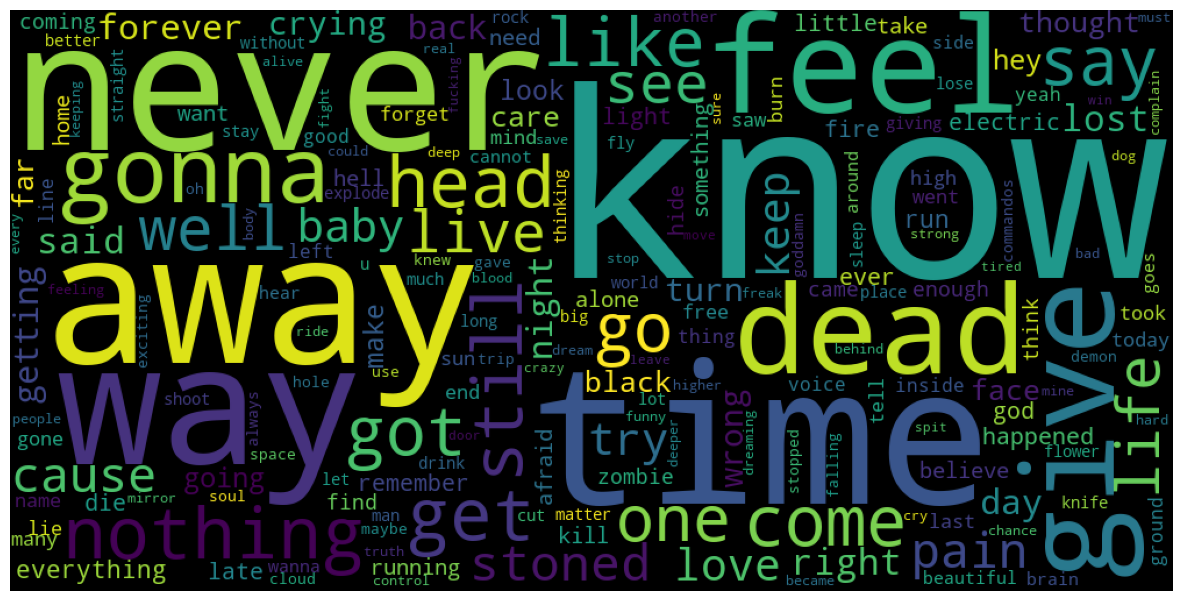

In [113]:
#convert list to string and generate
unique_string=(" ").join(cleaned_text)
from collections import Counter
word_could_dict=Counter(cleaned_text)

wordcloud = WordCloud(background_color='black', width = 1000, height = 500,collocations=False,random_state=100,stopwords=stop_words).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")


## Saving wordcloud picture

In [114]:
#plt.savefig("your_file_name"+".png", bbox_inches='tight')
#plt.show()
#plt.close()

## COLORED WORCLOUD

(-0.5, 999.5, 499.5, -0.5)

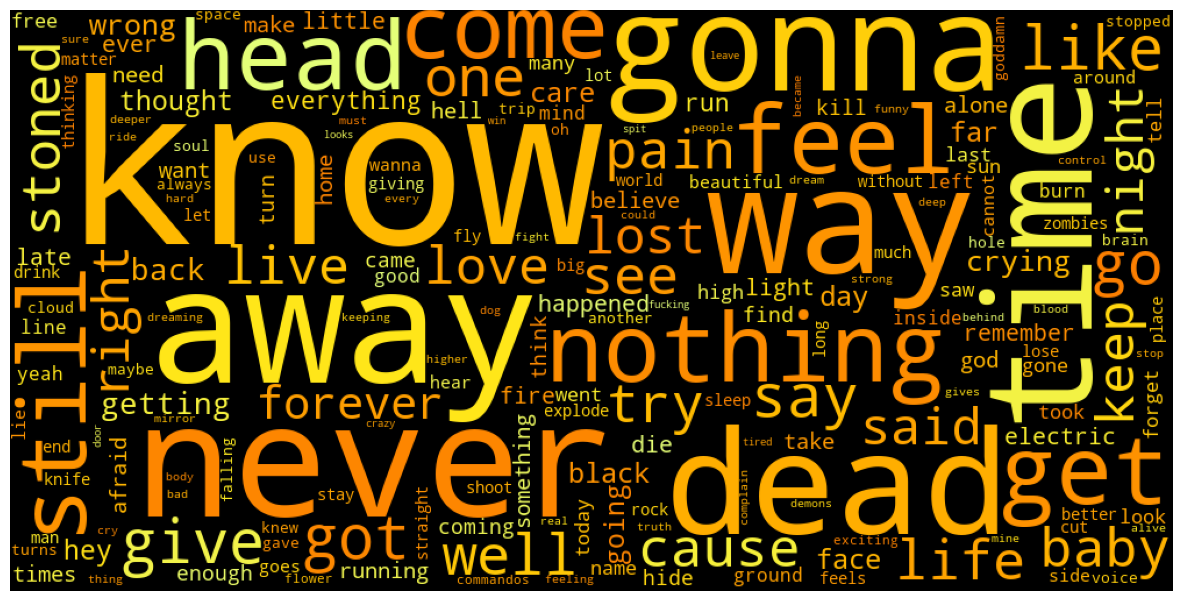

In [115]:
#Adding colors to wordcloud
from collections import Counter
word_could_dict=Counter(cleaned_text)

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 1000, height = 500,background_color='black', colormap='Wistia',random_state=100, collocations=False,stopwords = stop_words).generate_from_frequencies(word_could_dict)

# Display enerated image:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

## SHAPED WORDCLOUDS

In [116]:
# load image containing shape we re gonna use for wordcloud:

image1 = Image.open("https://raw.githubusercontent.com/hippoghost/NLP-sentiment_analysis-WordCloud-python/blob/master/datasets/photos/dok4.jpg")
#image1 = Image.open("C:/Users/domna/Desktop/GITHUB/data/Nightstalker/photo/dok4.jpg")
#image1 = Image.open("C:/Users/EFKA-PC/Desktop/github1/photo/dok4.jpg")

# convert image to numpy array:
data = asarray(image1)

print(type(data))

# summarize shape:
print(data.shape)

<class 'numpy.ndarray'>
(1630, 2416, 3)


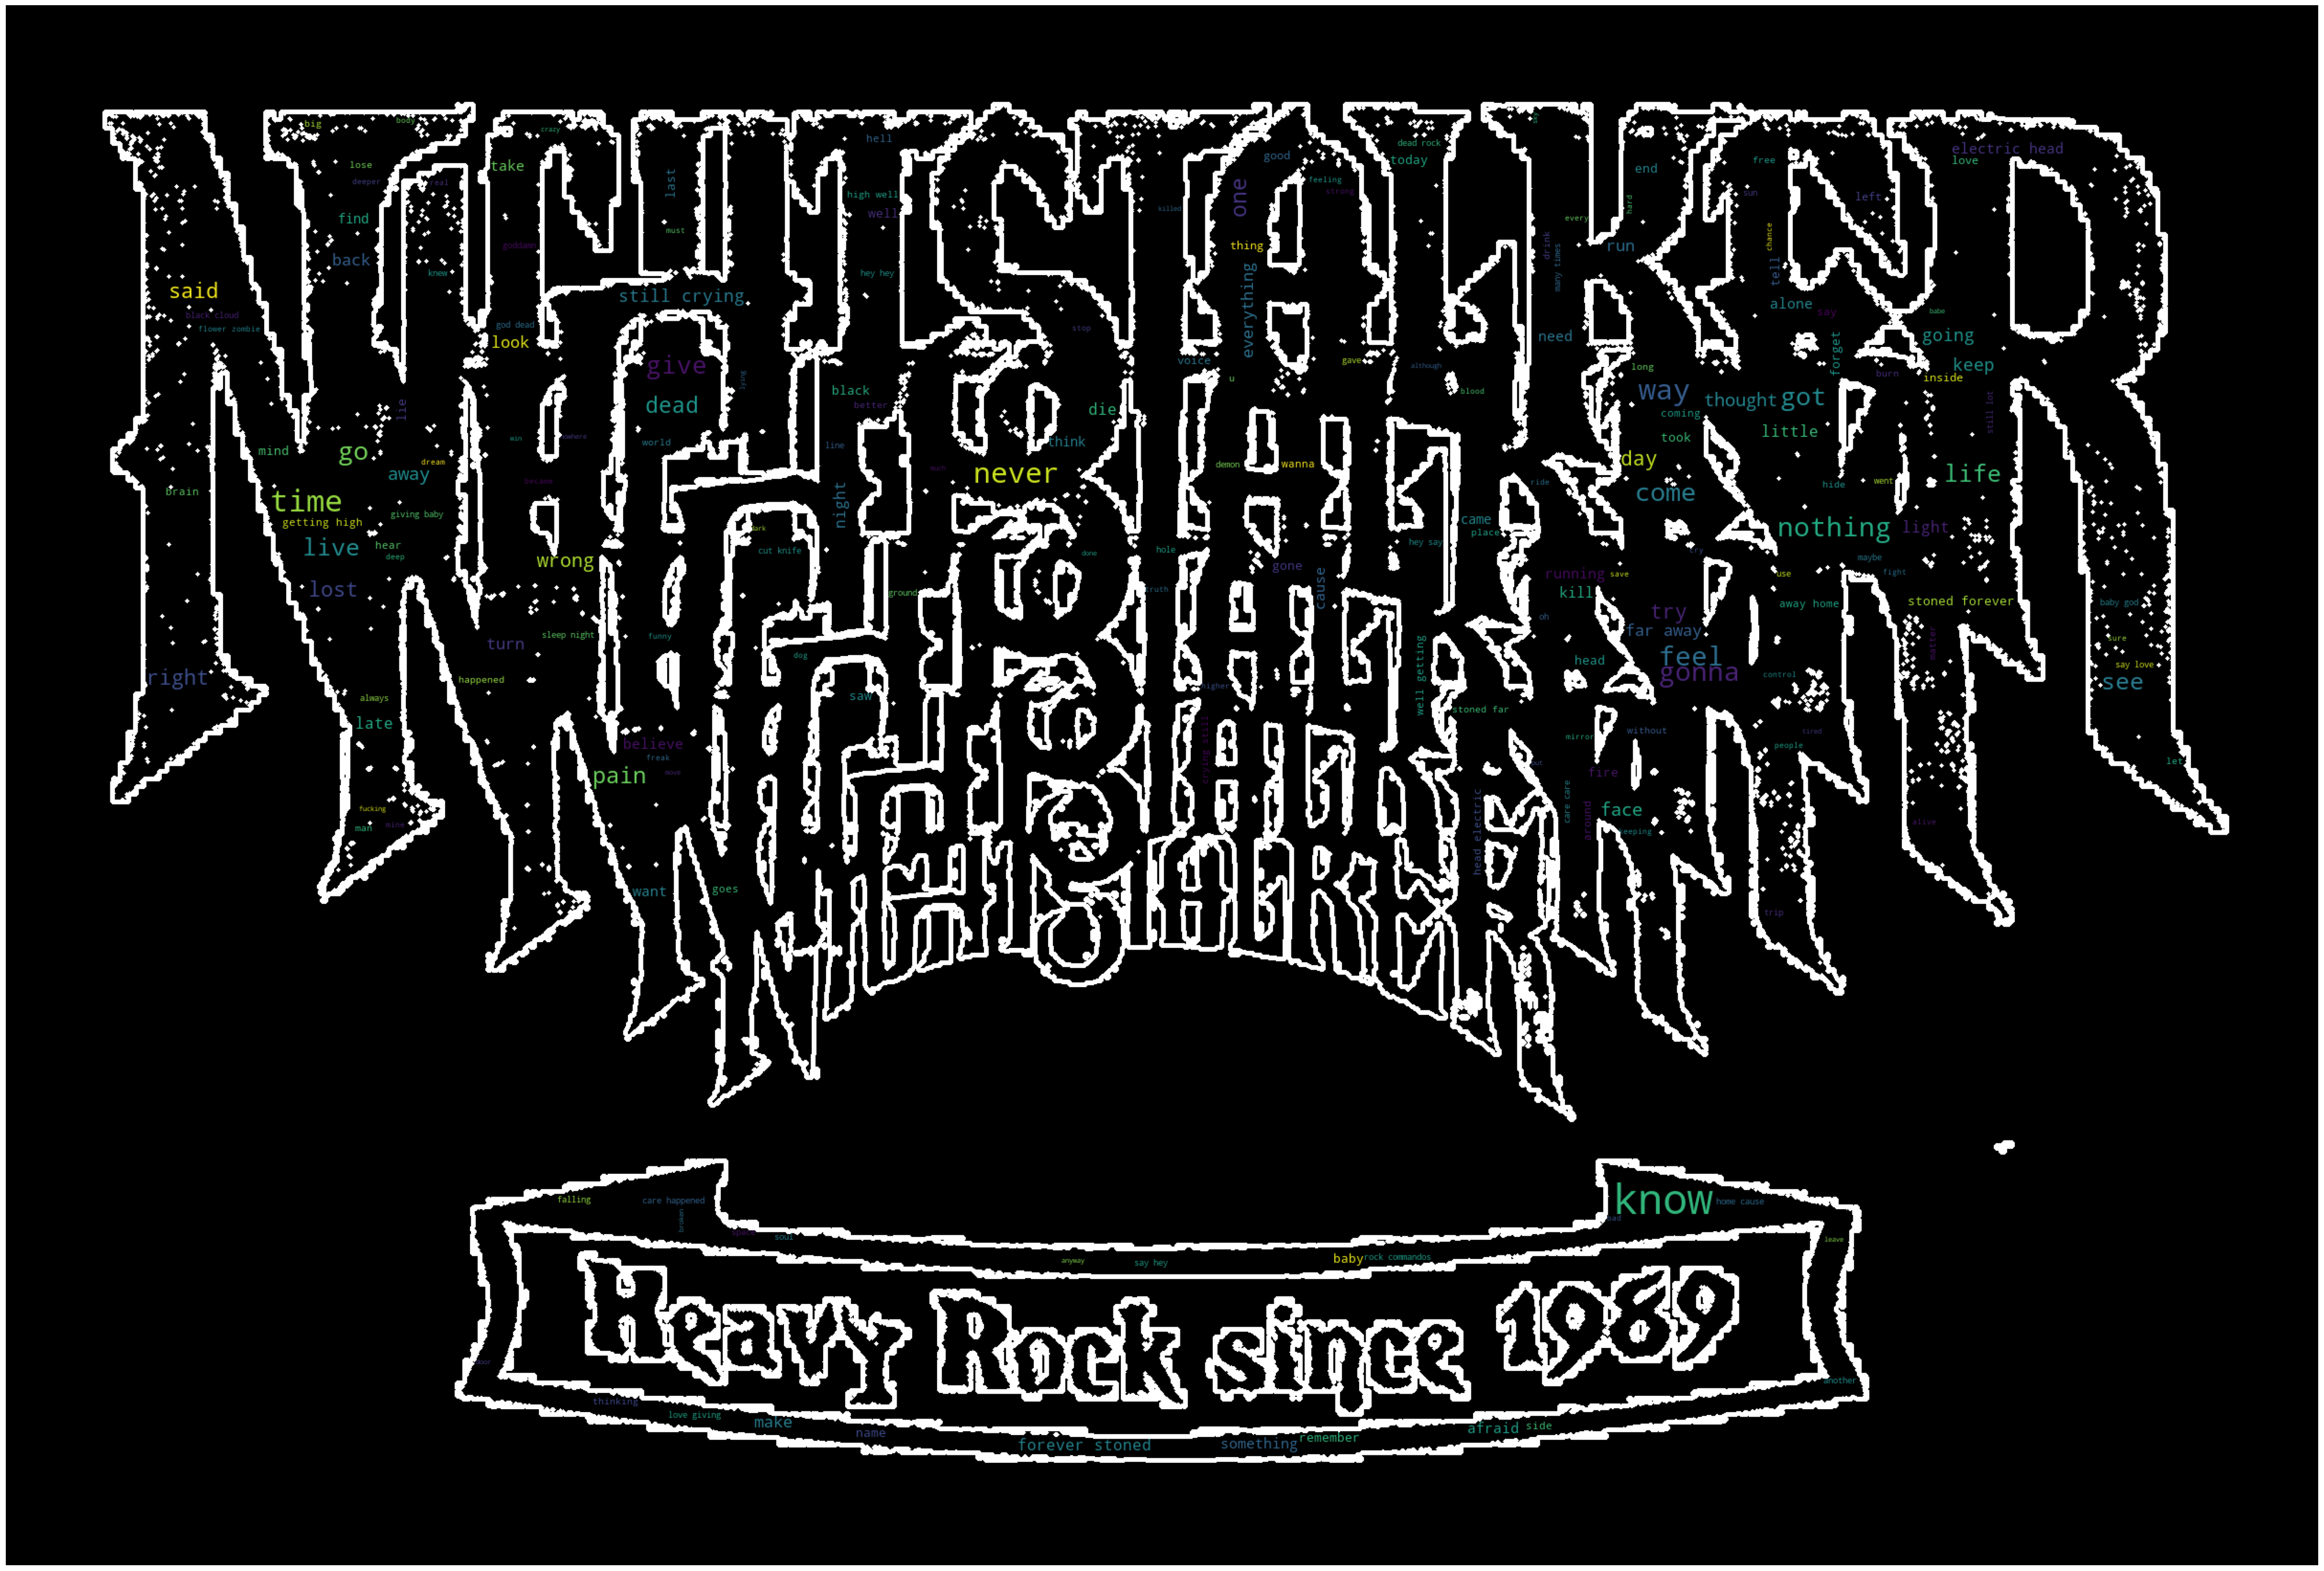

In [117]:
# load image containing shape we re gonna use for wordcloud:

# Creating 2nd shaped Wordcloud:
wordcloud = WordCloud(width=80,height=80,collocations=False,random_state=100,stopwords = stop_words).generate_from_frequencies(word_could_dict)

mwc= WordCloud(background_color='black', mask=data,contour_width=5,contour_color='white')
mwc.generate(unique_string)
plt.figure(figsize=(40,40))

# Display generated image:
plt.imshow(mwc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
#plt.savefig('wordclouddokimi.jpg', facecolor='k', bbox_inches='tight')

In [118]:
from PIL import Image

from numpy import asarray

# load the image
#image3 = Image.open("C:/Users/domna/Desktop/GITHUB/data/Nightstalker/photo/heavy3.jpg")
#image3 = Image.open("C:/Users/EFKA-PC/Desktop/github1/photo/heavy/heavy3.jpg")
iage3=Image.open("https://raw.githubusercontent.com/hippoghost/NLP-sentiment_analysis-WordCloud-python/blob/master/datasets/photos/heavy3.jpg")
# convert image to numpy array

data = asarray(image3)

print(type(data))

# summarize shape

print(data.shape)

<class 'numpy.ndarray'>
(1080, 1000, 3)


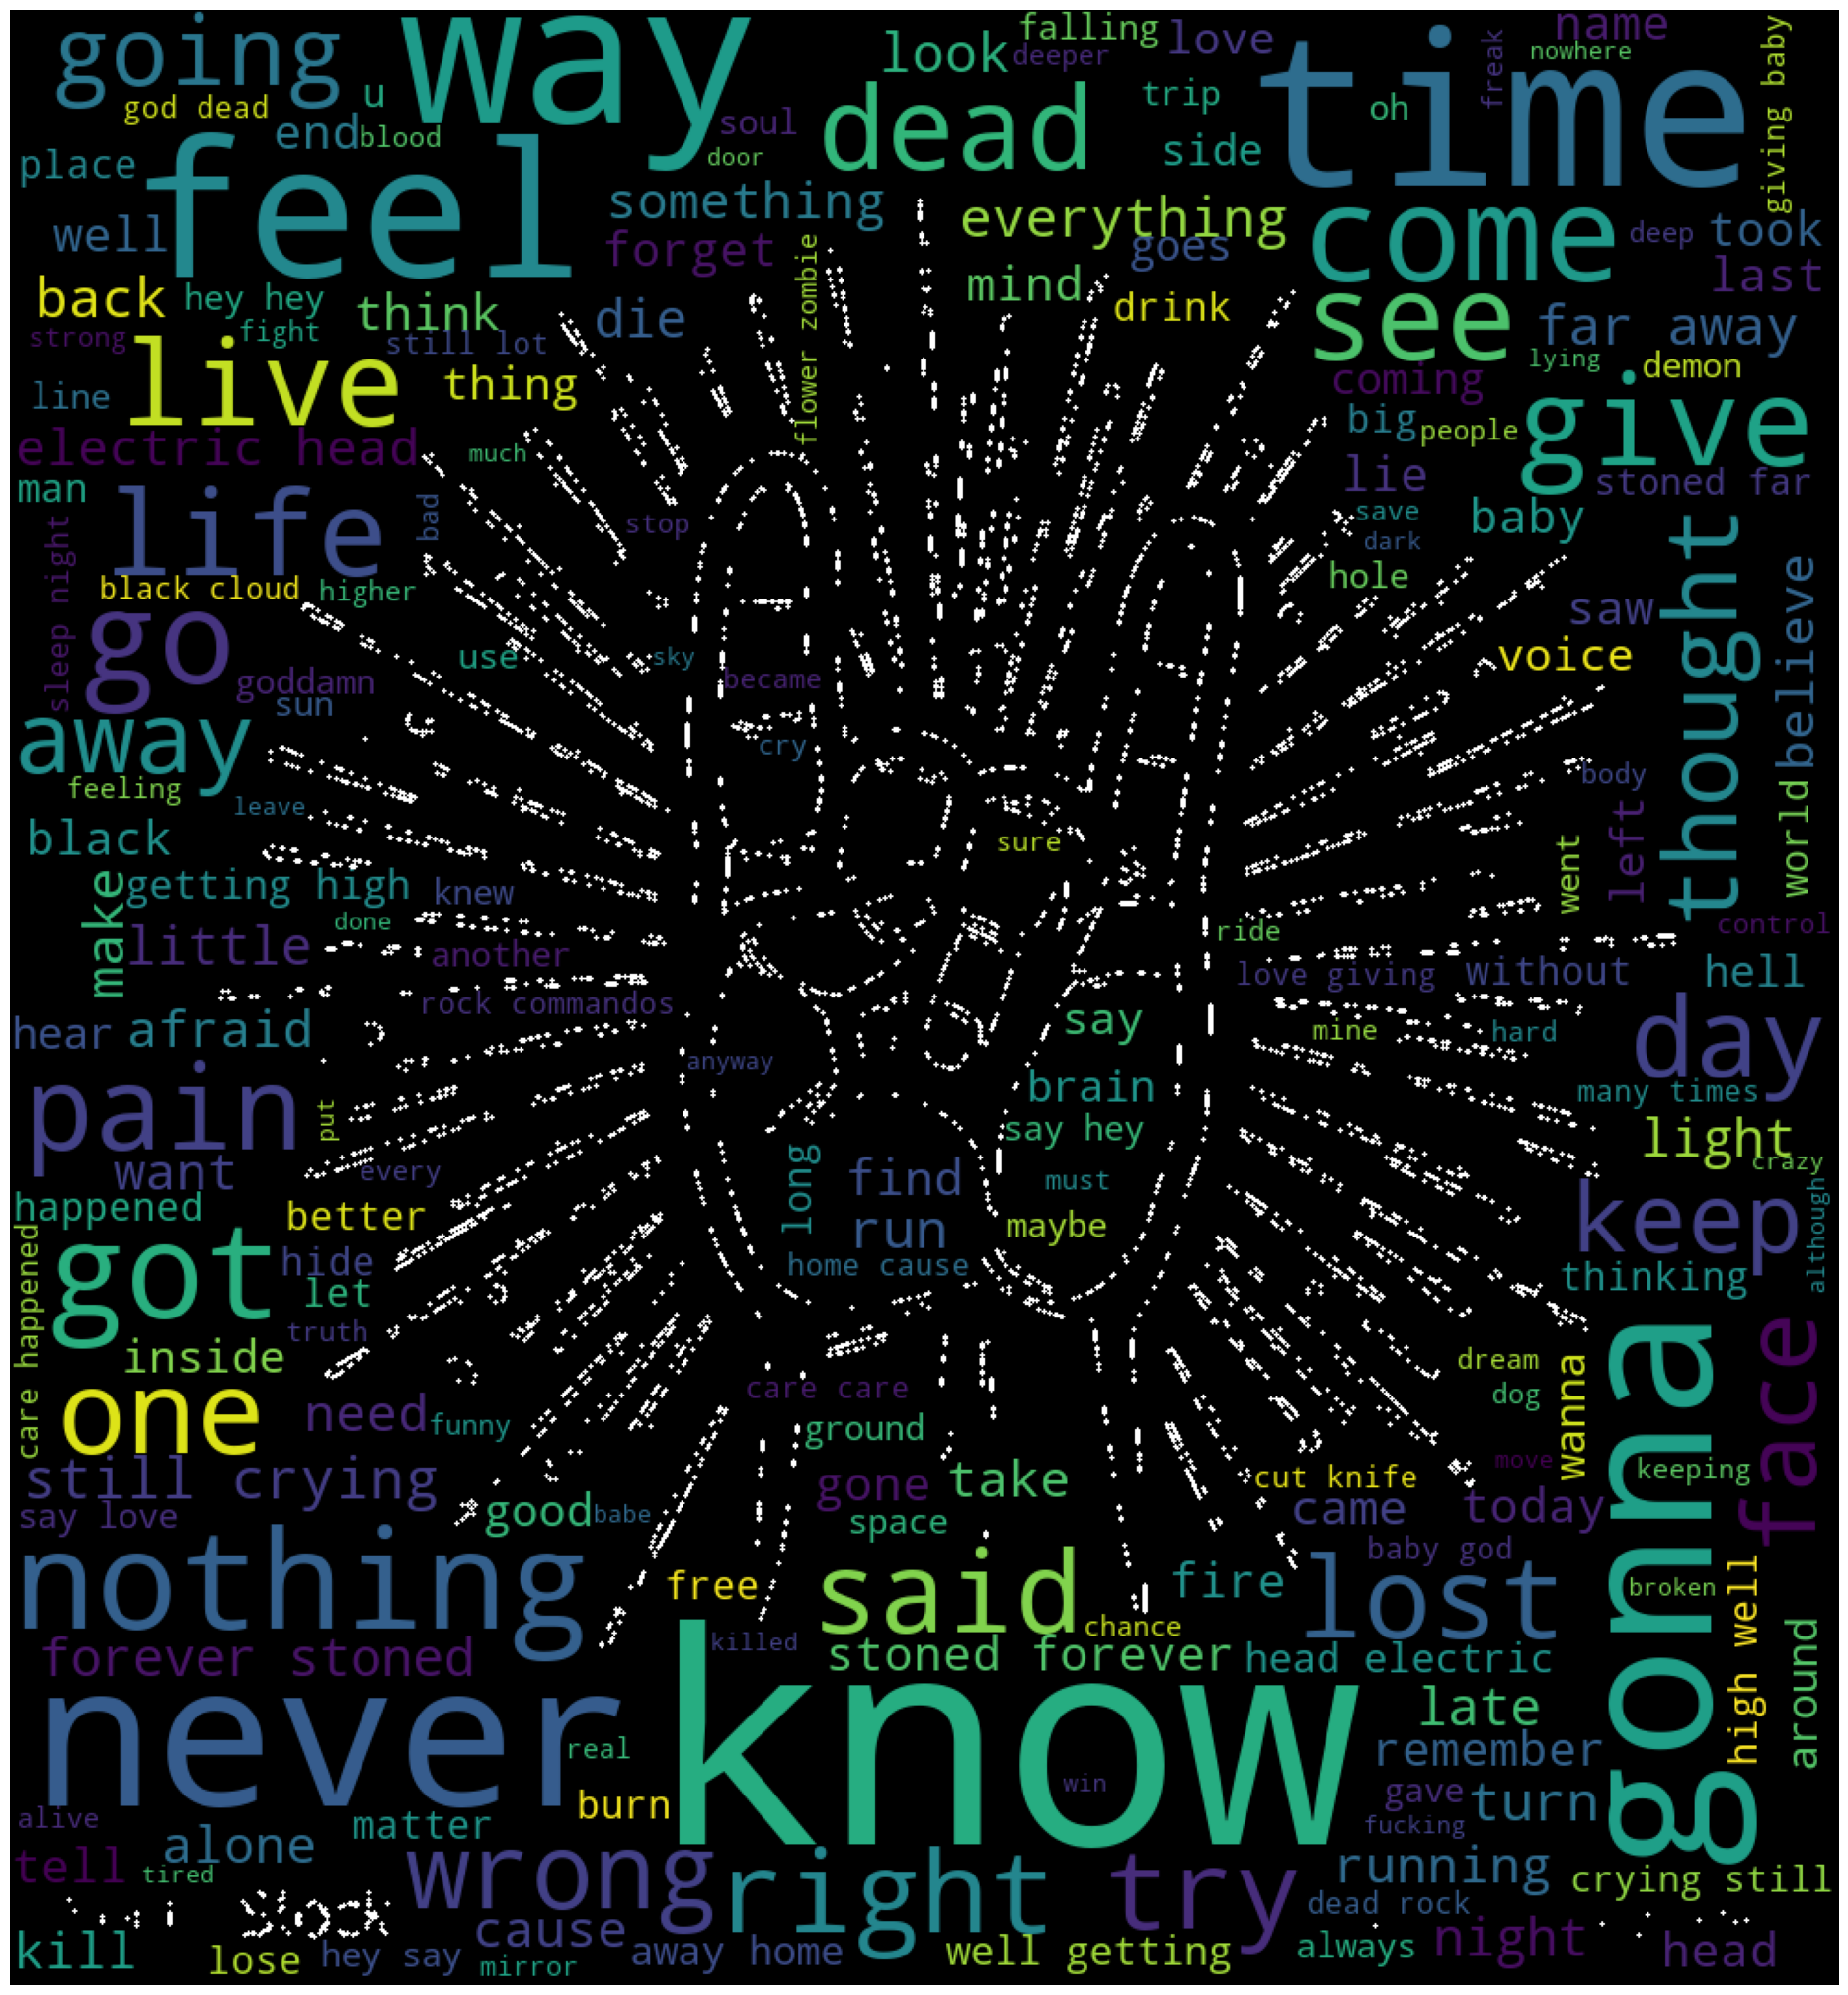

In [119]:
from collections import Counter
word_cloud_dict=Counter(cleaned_text)
wordcloud = WordCloud(width=40,height=40,random_state=100,stopwords = stop_words).generate_from_frequencies(word_could_dict)

# TELEIA
mwc= WordCloud(background_color='black', mask=data,contour_width=2,contour_color='white')
mwc.generate(unique_string)
plt.figure(figsize=(20,20))

plt.imshow(mwc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
#plt.savefig('wordclouddokimi.jpg', facecolor='k', bbox_inches='tight')

In [120]:
from PIL import Image

from numpy import asarray

# load the image

#image4 = Image.open("C:/Users/domna/Desktop/GITHUB/data/Nightstalker/photo/heavy11.jpg")
#image4 = Image.open("C:/Users/EFKA-PC/Desktop/github1/photo/heavy/heavy11.jpg")
image4=Image.open("https://raw.githubusercontent.com/hippoghost/NLP-sentiment_analysis-WordCloud-python/blob/master/datasets/photos/heavy11.jpg")

# convert image to numpy array

data = asarray(image4)

print(type(data))

# summarize shape

print(data.shape)

<class 'numpy.ndarray'>
(1080, 1000, 3)


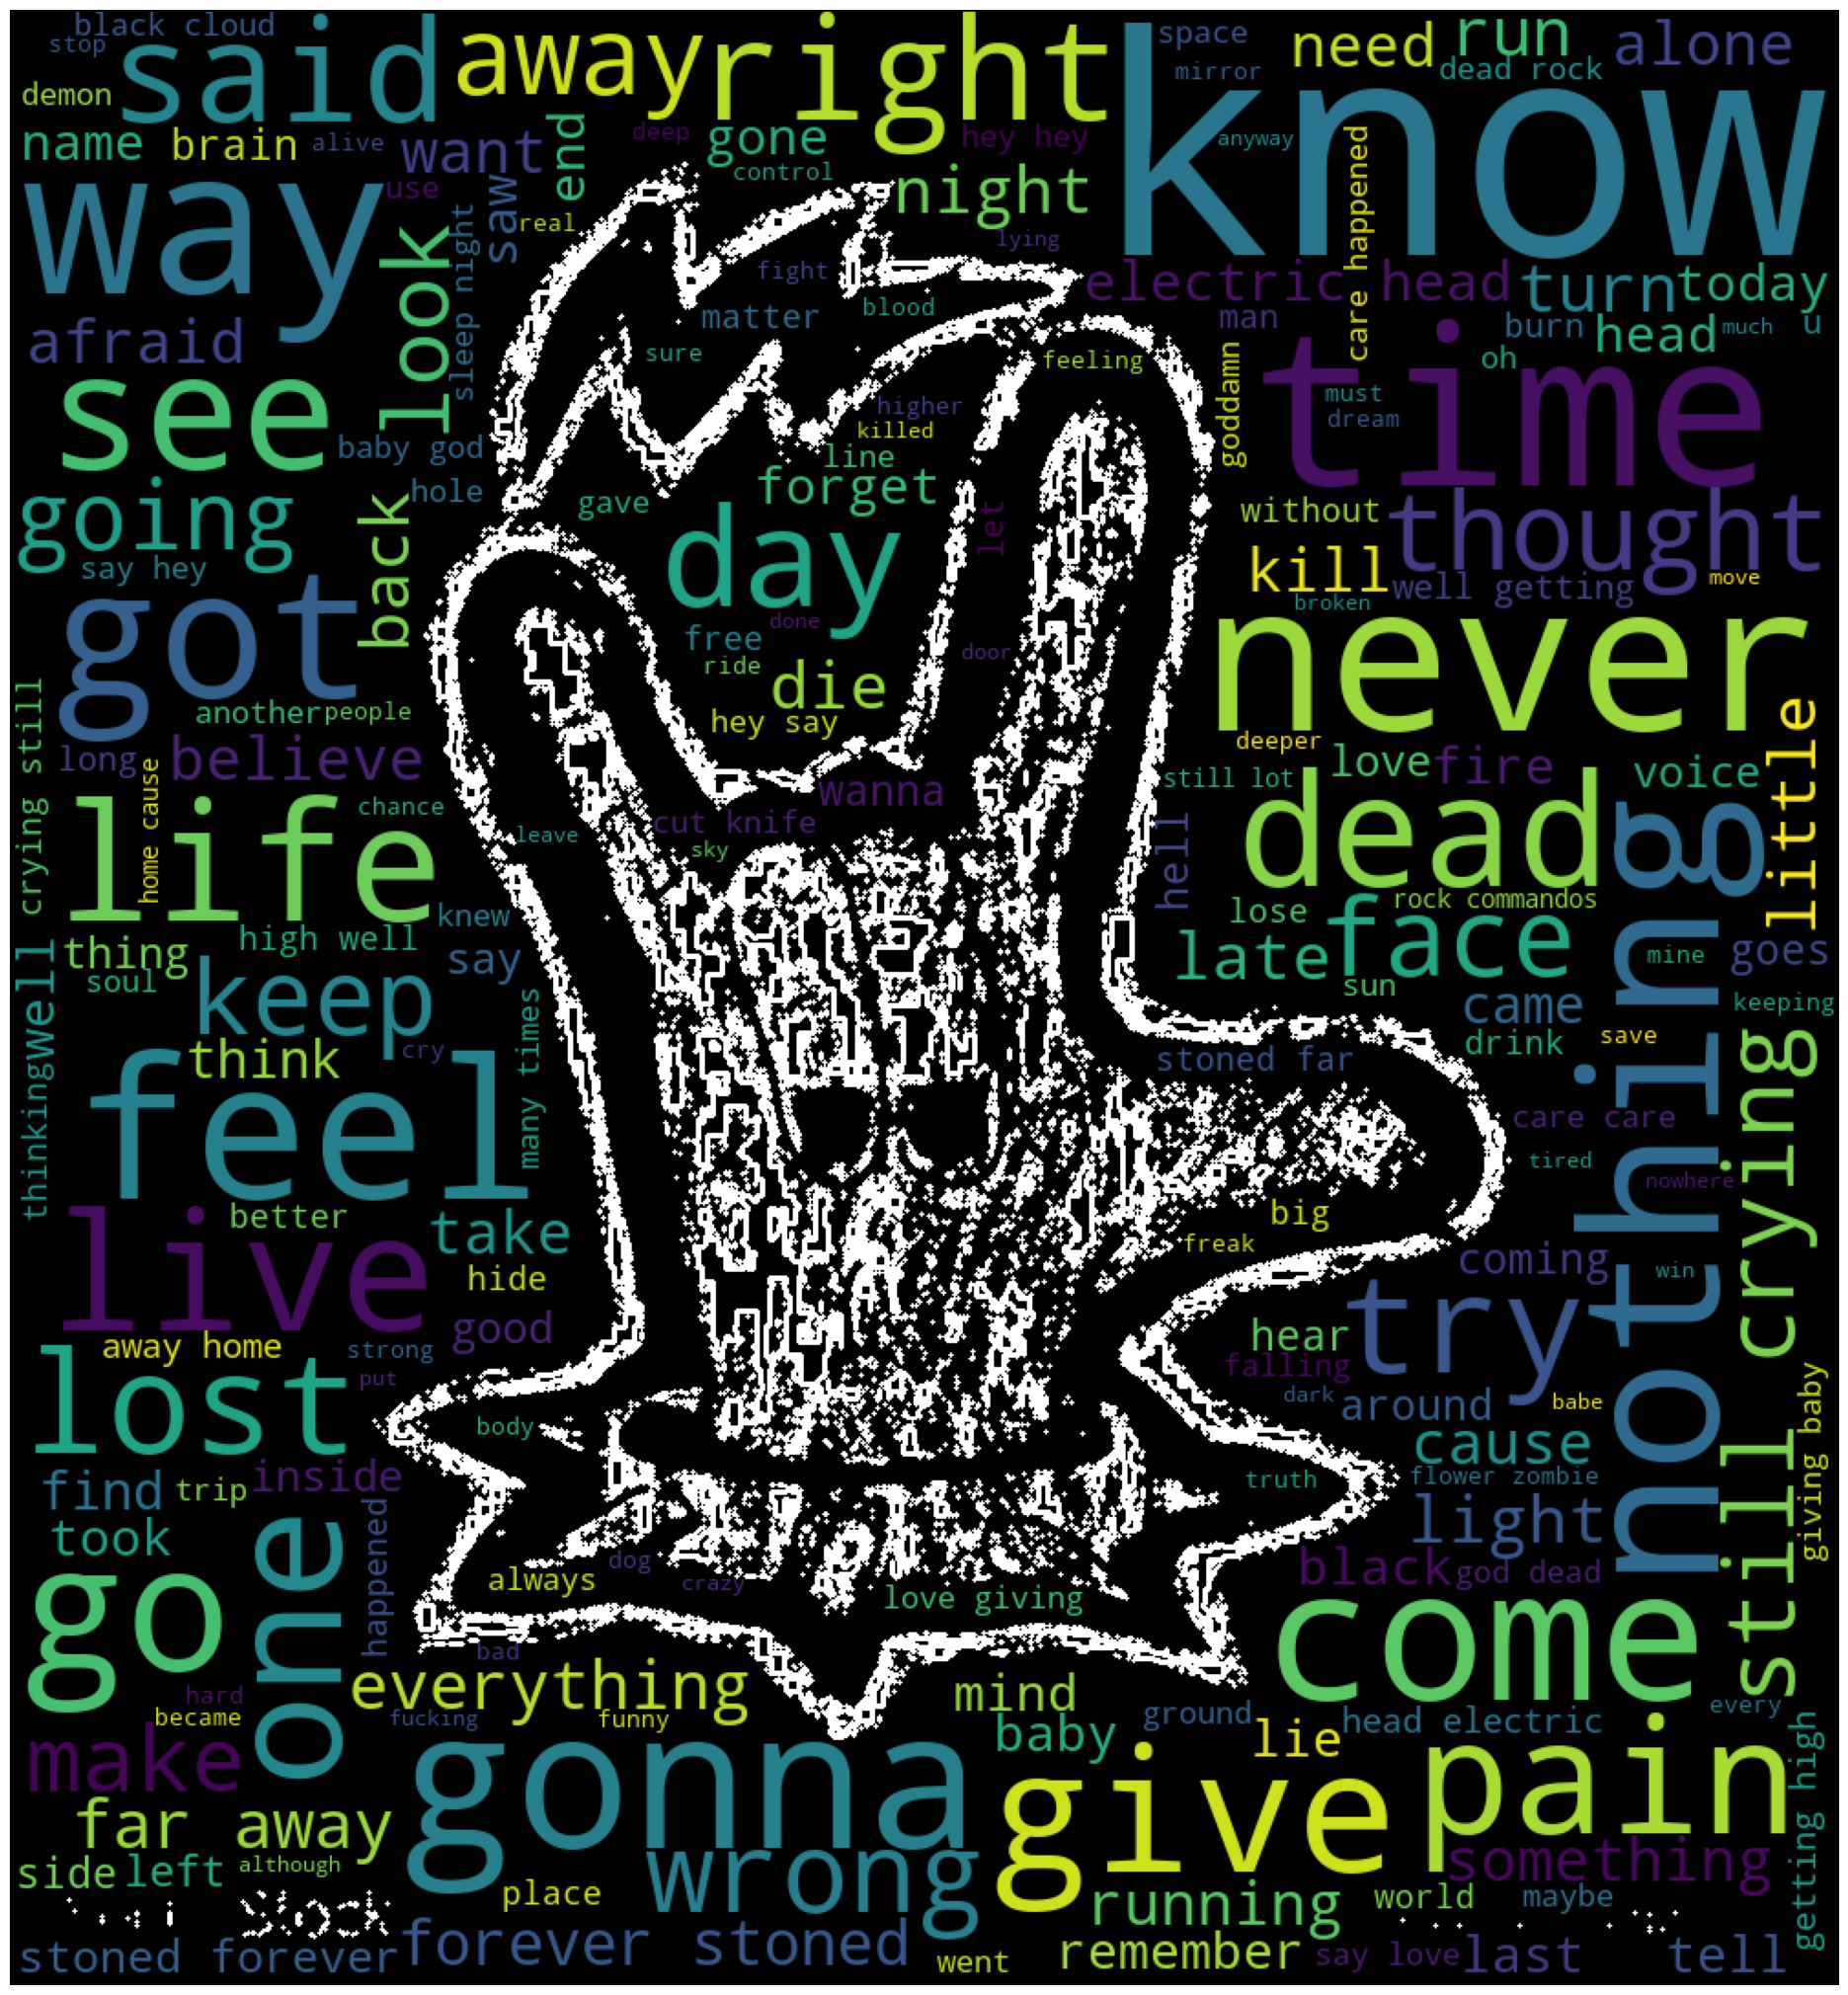

In [121]:
from collections import Counter
word_cloud_dict=Counter(cleaned_text)
wordcloud = WordCloud(width=40,height=40,random_state=100,stopwords = stop_words).generate_from_frequencies(word_could_dict)

# TELEIA
mwc= WordCloud(background_color='black', mask=data,contour_width=2,contour_color='white')
mwc.generate(unique_string)
plt.figure(figsize=(20,20))

plt.imshow(mwc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
#plt.savefig('wordclouddokimi.jpg', facecolor='k', bbox_inches='tight')

In [122]:
from collections import Counter
word_cloud_dict=Counter(cleaned_text)
type(word_cloud_dict)

collections.Counter

In [123]:
df=pd.DataFrame([word_cloud_dict])
df.shape

(1, 770)

In [124]:
df1 = df.reindex(sorted(df.columns), axis=1)
df1

2009  across  act  addiction  afraid  aggressive  ago  ahead  air  alive  \
0     2       3    1          1      12           1    1      3    4      5   

   ...  worst  would  wounds  wrong  yeah  yes  young  zero  zombie  zombies  
0  ...      2      4       2     17     9    2      1     1       4        7  

[1 rows x 770 columns]

In [125]:
df1=df1.transpose()
df1

0
2009        2
across      3
act         1
addiction   1
afraid     12
...        ..
yes         2
young       1
zero        1
zombie      4
zombies     7

[770 rows x 1 columns]

In [126]:
df1.rename(columns = {df1.columns[0]: 'times_appeared'}, inplace = True)
df1

times_appeared
2009                    2
across                  3
act                     1
addiction               1
afraid                 12
...                   ...
yes                     2
young                   1
zero                    1
zombie                  4
zombies                 7

[770 rows x 1 columns]

In [127]:
df1=df1.sort_values('times_appeared',ascending=False)
df1

times_appeared
know                   94
away                   42
never                  41
time                   35
way                    35
...                   ...
grave                   1
reach                   1
rains                   1
grooving                1
boggieman               1

[770 rows x 1 columns]

In [128]:
modified=df1.reset_index()
print(modified)

         index  times_appeared
0         know              94
1         away              42
2        never              41
3         time              35
4          way              35
..         ...             ...
765      grave               1
766      reach               1
767      rains               1
768   grooving               1
769  boggieman               1

[770 rows x 2 columns]


In [129]:
modified.rename(columns = {modified.columns[0]: 'word'}, inplace = True)
modified

word  times_appeared
0         know              94
1         away              42
2        never              41
3         time              35
4          way              35
..         ...             ...
765      grave               1
766      reach               1
767      rains               1
768   grooving               1
769  boggieman               1

[770 rows x 2 columns]

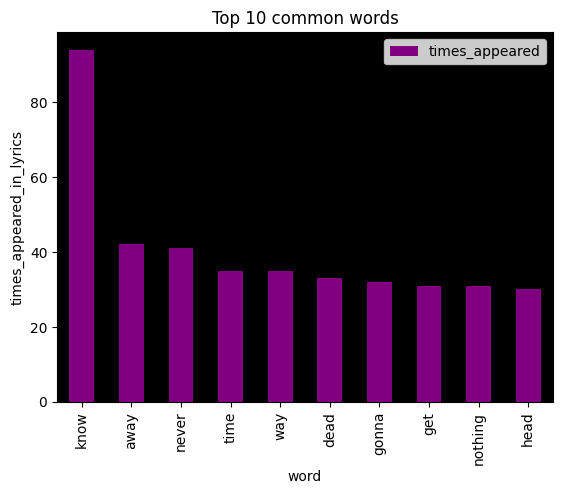

In [130]:
modified.iloc[0:10].plot.bar(x="word",y="times_appeared", title="Top 10 common words",color="purple")
ax = plt.gca()
ax.set_facecolor('xkcd:black')
plt.xlabel("word")
plt.ylabel("times_appeared_in_lyrics")
plt.show()

Average number of characters per word: 4.8578


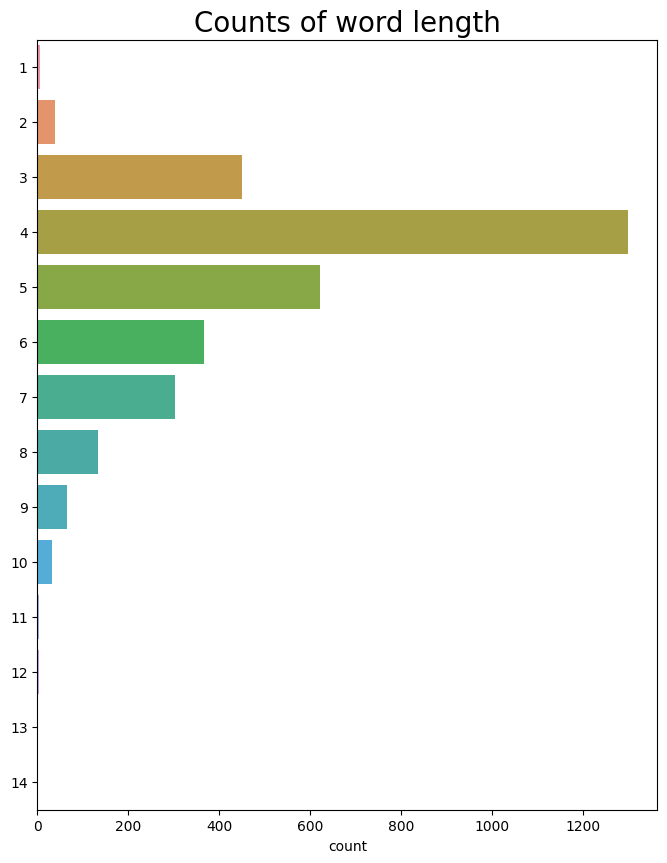

In [131]:
import numpy as np
import seaborn as sns

# Create list of token lengths for each token  
word_length = [len(t) for t in cleaned_text]
# Average number of characters per token  
print(f"Average number of characters per word: {round(np.mean(word_length),4)}")

# Plot distribution  
plt.figure(figsize=(8, 10))  
sns.countplot(y=word_length)  
plt.title("Counts of word length", size=20);

# SENTIMENT ANALYSIS

## A. sentiment analysis on raw text lyrics

In [132]:
mystring=' '
for x in cleaned_text:
    mystring +=' '+ x
print(mystring)

  spit must something want today say nothing maybe silence gives better way know come damned give much pretend know life go spit ground worry problems never running always win second second prize know come damned give much pretend know life go spit ground leave alone wanna hear leave please take garbage door know come damned give much pretend know life go spit ground name happy must right gave birth little gentle creatures know managed tell looks evil cause know mean world freedom people use people everyday looks hard believe made us like image tell name name life pasts faster thought end make difference beginning look hard times lose times win cause know mean life giving people use people everyday looks hard believe made us like image tell name name funny paper know right wrong need set mind free life illusion keep eye know getting power little piece sweat sweat firing brains know keep knockin said feels like coming crazy feeling deny came way tell nothing hear goddamned song fucking 

In [133]:
type(mystring)

str

## a1.Sentiment analysis in all lyrics using Vader 

In [134]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores(mystring)

[nltk_data] Downloading package vader_lexicon to C:\Users\EFKA-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.244, 'neu': 0.559, 'pos': 0.197, 'compound': -0.9997}

## a2.Sentiment Analysis in all lyrics using TextBlob

In [135]:
from textblob import TextBlob

blob = TextBlob(mystring)


In [136]:
blob.sentiment.polarity

0.03849318772395699

In [137]:
from textblob import TextBlob

In [138]:
blob.sentiment.subjectivity

0.5421842995560938

In [139]:

blob.words 

WordList(['spit', 'must', 'something', 'want', 'today', 'say', 'nothing', 'maybe', 'silence', 'gives', 'better', 'way', 'know', 'come', 'damned', 'give', 'much', 'pretend', 'know', 'life', 'go', 'spit', 'ground', 'worry', 'problems', 'never', 'running', 'always', 'win', 'second', 'second', 'prize', 'know', 'come', 'damned', 'give', 'much', 'pretend', 'know', 'life', 'go', 'spit', 'ground', 'leave', 'alone', 'wan', 'na', 'hear', 'leave', 'please', 'take', 'garbage', 'door', 'know', 'come', 'damned', 'give', 'much', 'pretend', 'know', 'life', 'go', 'spit', 'ground', 'name', 'happy', 'must', 'right', 'gave', 'birth', 'little', 'gentle', 'creatures', 'know', 'managed', 'tell', 'looks', 'evil', 'cause', 'know', 'mean', 'world', 'freedom', 'people', 'use', 'people', 'everyday', 'looks', 'hard', 'believe', 'made', 'us', 'like', 'image', 'tell', 'name', 'name', 'life', 'pasts', 'faster', 'thought', 'end', 'make', 'difference', 'beginning', 'look', 'hard', 'times', 'lose', 'times', 'win', 'caus

In [140]:
blob.sentiment.polarity

0.03849318772395699

# B.Sentiment analysis in each song seperately

In [141]:
#pip install openpyxl

In [190]:
# importing pandas as pd
import pandas as pd

# read an excel file and convert
# into a dataframe object
#pf=pd.DataFrame(pd.read_excel("C:/Users/domna/Desktop/GITHUB/python_NLP/lyricsxl.xlsx"))
#pf = pd.DataFrame(pd.read_excel("C:/Users/EFKA-PC/Desktop/github1/python_NLP/lyricsxl.xlsx"))
pf = pd.DataFrame(pd.read_excel("https://raw.githubusercontent.com/hippoghost/NLP-sentiment_analysis-WordCloud-python/blob/master/datasets/datasets/lyricsxl.xlsx")
# adding an row_id field to the dataframe, which will be useful for joining later
#pf["row_id"] = pf.index + 1
#print first 10 rows 

# show the dataframe
pf.head(5)

artist                song    album  year  \
0  Nighstalker                 Use  Side FX  1994   
1  Nighstalker  What Your Name Is   Side FX  1994   
2  Nighstalker         Funny Paper  Side FX  1994   
3  Nighstalker        Mad Prophet   Side FX  1994   
4  Nighstalker       Keep Knockin'  Side FX  1994   

                                              lyrics  
0  There must be something\nThat you want to do a...  
1  How happy you must be right now that you gave ...  
2  You don't know what's right or wrong with it\n...  
3  Well I was drinking in the demons valley\nWhen...  
4  It's been said and it feels like coming\nCrazy...

## Remove extra punctuations

In [ ]:
# Make sure the lyrics are string
pf['lyrics'] = pf['lyrics'].astype(str)

# Put the lyrics into a new column CleanedLyrics
pf['CleanedLyrics'] = pf['lyrics'].str.lower().str.split()

# Remove all stopwords from the lyrics 
pf['CleanedLyrics'] = pf['CleanedLyrics'].apply(lambda x: [item for item in x if item not in stop_words])
pf.head(2)

## B1.Sentiment Using Vader in cleaned_Lyrics

In [192]:
vader_dataframe=pf
vader_dataframe

artist                  song                 album  year  \
0   Nighstalker                   Use               Side FX  1994   
1   Nighstalker    What Your Name Is                Side FX  1994   
2   Nighstalker           Funny Paper               Side FX  1994   
3   Nighstalker          Mad Prophet                Side FX  1994   
4   Nighstalker         Keep Knockin'               Side FX  1994   
..          ...                   ...                   ...   ...   
64  Nighstalker      Seven out of ten  Great Hallucinations  2019   
65  Nighstalker                Cursed  Great Hallucinations  2019   
66  Nighstalker            Half Crazy  Great Hallucinations  2019   
67  Nighstalker    Hole in the Mirror  Great Hallucinations  2019   
68  Nighstalker  Great Hallucinations  Great Hallucinations  2019   

                                               lyrics  \
0   There must be something\nThat you want to do a...   
1   How happy you must be right now that you gave ...   
2   You don't know what's right or wrong with it\n...   
3   Well I was drinking in the demons valley\nWhen...   
4   It's been said and it feels like coming\nCrazy...   
..                                                ...   
64  All alone, sick and tired\nA new day has come\...   
65  You want something but you don't know what\nYo...   
66  I'm not sure what I'm talking about\nIt came d...   
67  I see a face in the mirror, getting older\nI s...   
68  Maybe it's time to die\nMaybe not today\nHow m...   

                                        CleanedLyrics  
0   [there, must, be, something, that, you, want, ...  
1   [how, happy, you, must, be, right, now, that, ...  
2   [you, don't, know, what's, right, or, wrong, w...  
3   [well, i, was, drinking, in, the, demons, vall...  
4   [it's, been, said, and, it, feels, like, comin...  
..                                                ...  
64  [all, alone,, sick, and, tired, a, new, day, h...  
65  [you, want, something, but, you, don't, know, ...  
66  [i'm, not, sure, what, i'm, talking, about, it...  
67  [i, see, a, face, in, the, mirror,, getting, o...  
68  [maybe, it's, time, to, die, maybe, not, today...  

[69 rows x 6 columns]

In [193]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [194]:
#sia = SentimentIntensityAnalyzer()
sid = SentimentIntensityAnalyzer()
vader_dataframe['scores']= vader_dataframe['CleanedLyrics'].apply(lambda CleanedLyrics: sid.polarity_scores(CleanedLyrics))
vader_dataframe.head(3)

AttributeError: 'list' object has no attribute 'encode'

In [195]:
a = (vader_dataframe.applymap(type) == list).all()
print (a)


artist           False
song             False
album            False
year             False
lyrics           False
CleanedLyrics     True
dtype: bool


In [196]:
#turn column into string in order to apply polarity scores
vader_dataframe['new_CleanedLyrics'] = [' '.join(map(str, l)) for l in vader_dataframe['CleanedLyrics']]
vader_dataframe.head(2)

artist                song    album  year  \
0  Nighstalker                 Use  Side FX  1994   
1  Nighstalker  What Your Name Is   Side FX  1994   

                                              lyrics  \
0  There must be something\nThat you want to do a...   
1  How happy you must be right now that you gave ...   

                                       CleanedLyrics  \
0  [there, must, be, something, that, you, want, ...   
1  [how, happy, you, must, be, right, now, that, ...   

                                   new_CleanedLyrics  
0  there must be something that you want to do ag...  
1  how happy you must be right now that you gave ...

In [197]:
#processed song VADER sentiment analysis

sid = SentimentIntensityAnalyzer()
vader_dataframe['scores'] = vader_dataframe['new_CleanedLyrics'].apply(lambda new_CleanedLyrics: sid.polarity_scores(new_CleanedLyrics))
vader_dataframe.head(3)

artist                song    album  year  \
0  Nighstalker                 Use  Side FX  1994   
1  Nighstalker  What Your Name Is   Side FX  1994   
2  Nighstalker         Funny Paper  Side FX  1994   

                                              lyrics  \
0  There must be something\nThat you want to do a...   
1  How happy you must be right now that you gave ...   
2  You don't know what's right or wrong with it\n...   

                                       CleanedLyrics  \
0  [there, must, be, something, that, you, want, ...   
1  [how, happy, you, must, be, right, now, that, ...   
2  [you, don't, know, what's, right, or, wrong, w...   

                                   new_CleanedLyrics  \
0  there must be something that you want to do ag...   
1  how happy you must be right now that you gave ...   
2  you don't know what's right or wrong with it b...   

                                              scores  
0  {'neg': 0.146, 'neu': 0.764, 'pos': 0.09, 'com...  
1  {'neg': 0.136, 'neu': 0.728, 'pos': 0.136, 'co...  
2  {'neg': 0.085, 'neu': 0.849, 'pos': 0.066, 'co...

In [198]:
x=vader_dataframe['scores']
x

0     {'neg': 0.146, 'neu': 0.764, 'pos': 0.09, 'com...
1     {'neg': 0.136, 'neu': 0.728, 'pos': 0.136, 'co...
2     {'neg': 0.085, 'neu': 0.849, 'pos': 0.066, 'co...
3     {'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...
4     {'neg': 0.208, 'neu': 0.758, 'pos': 0.034, 'co...
                            ...                        
64    {'neg': 0.19, 'neu': 0.787, 'pos': 0.023, 'com...
65    {'neg': 0.024, 'neu': 0.821, 'pos': 0.155, 'co...
66    {'neg': 0.017, 'neu': 0.887, 'pos': 0.095, 'co...
67    {'neg': 0.09, 'neu': 0.843, 'pos': 0.066, 'com...
68    {'neg': 0.219, 'neu': 0.74, 'pos': 0.041, 'com...
Name: scores, Length: 69, dtype: object

In [199]:
# appending the sentiment scores to the original dataframe  
#make a new dataframe
x= pd.DataFrame(list(x))
vader_dataframe = vader_dataframe.join(x)


In [200]:
vader_dataframe['compound'] = vader_dataframe['scores'].apply(lambda score_dict: score_dict['compound'])
vader_dataframe['sentiment']=''
vader_dataframe.loc[vader_dataframe.compound>0,'sentiment']='positive'
vader_dataframe.loc[vader_dataframe.compound==0,'sentiment']='neutral'
vader_dataframe.loc[vader_dataframe.compound<0,'sentiment']='negative'
vader_dataframe.head(1)

artist song    album  year  \
0  Nighstalker  Use  Side FX  1994   

                                              lyrics  \
0  There must be something\nThat you want to do a...   

                                       CleanedLyrics  \
0  [there, must, be, something, that, you, want, ...   

                                   new_CleanedLyrics  \
0  there must be something that you want to do ag...   

                                              scores    neg    neu   pos  \
0  {'neg': 0.146, 'neu': 0.764, 'pos': 0.09, 'com...  0.146  0.764  0.09   

   compound sentiment  
0   -0.5267  negative

In [201]:
# Count the amount of words in each song and store it in a new column 'wordCount'
vader_dataframe['wordCount'] = vader_dataframe['new_CleanedLyrics'].str.split().str.len()
vader_dataframe.head(2)

artist                song    album  year  \
0  Nighstalker                 Use  Side FX  1994   
1  Nighstalker  What Your Name Is   Side FX  1994   

                                              lyrics  \
0  There must be something\nThat you want to do a...   
1  How happy you must be right now that you gave ...   

                                       CleanedLyrics  \
0  [there, must, be, something, that, you, want, ...   
1  [how, happy, you, must, be, right, now, that, ...   

                                   new_CleanedLyrics  \
0  there must be something that you want to do ag...   
1  how happy you must be right now that you gave ...   

                                              scores    neg    neu    pos  \
0  {'neg': 0.146, 'neu': 0.764, 'pos': 0.09, 'com...  0.146  0.764  0.090   
1  {'neg': 0.136, 'neu': 0.728, 'pos': 0.136, 'co...  0.136  0.728  0.136   

   compound sentiment  wordCount  
0   -0.5267  negative        136  
1   -0.2890  negative        152

In [202]:
vader_dataframe=vader_dataframe[['artist','song','album','year','neg','neu','pos','compound','sentiment','wordCount','new_CleanedLyrics']]
vader_dataframe

artist                  song                 album  year    neg  \
0   Nighstalker                   Use               Side FX  1994  0.146   
1   Nighstalker    What Your Name Is                Side FX  1994  0.136   
2   Nighstalker           Funny Paper               Side FX  1994  0.085   
3   Nighstalker          Mad Prophet                Side FX  1994  0.000   
4   Nighstalker         Keep Knockin'               Side FX  1994  0.208   
..          ...                   ...                   ...   ...    ...   
64  Nighstalker      Seven out of ten  Great Hallucinations  2019  0.190   
65  Nighstalker                Cursed  Great Hallucinations  2019  0.024   
66  Nighstalker            Half Crazy  Great Hallucinations  2019  0.017   
67  Nighstalker    Hole in the Mirror  Great Hallucinations  2019  0.090   
68  Nighstalker  Great Hallucinations  Great Hallucinations  2019  0.219   

      neu    pos  compound sentiment  wordCount  \
0   0.764  0.090   -0.5267  negative        136   
1   0.728  0.136   -0.2890  negative        152   
2   0.849  0.066    0.2120  positive         60   
3   0.887  0.113    0.5423  positive         52   
4   0.758  0.034   -0.9468  negative         78   
..    ...    ...       ...       ...        ...   
64  0.787  0.023   -0.9621  negative        122   
65  0.821  0.155    0.9308  positive        119   
66  0.887  0.095    0.8680  positive        115   
67  0.843  0.066   -0.2942  negative        131   
68  0.740  0.041   -0.9762  negative        119   

                                    new_CleanedLyrics  
0   there must be something that you want to do ag...  
1   how happy you must be right now that you gave ...  
2   you don't know what's right or wrong with it b...  
3   well i was drinking in the demons valley when ...  
4   it's been said and it feels like coming crazy ...  
..                                                ...  
64  all alone, sick and tired a new day has come m...  
65  you want something but you don't know what you...  
66  i'm not sure what i'm talking about it came do...  
67  i see a face in the mirror, getting older i sa...  
68  maybe it's time to die maybe not today how man...  

[69 rows x 11 columns]

## Vizualizing Vader Sentiment

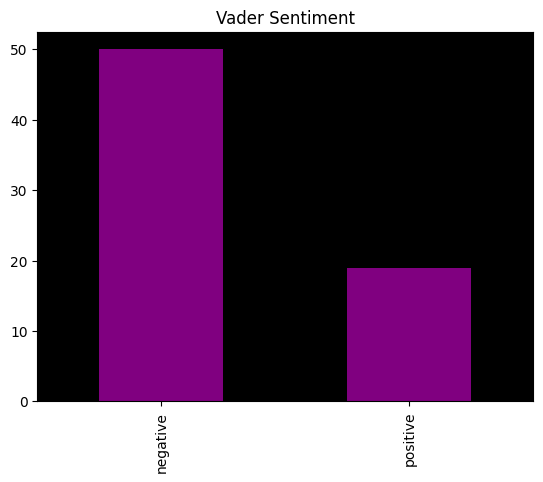

In [203]:
vader_dataframe.sentiment.value_counts().plot(kind='bar',title="Vader Sentiment",color="purple")
ax = plt.gca()
ax.set_facecolor('xkcd:black')

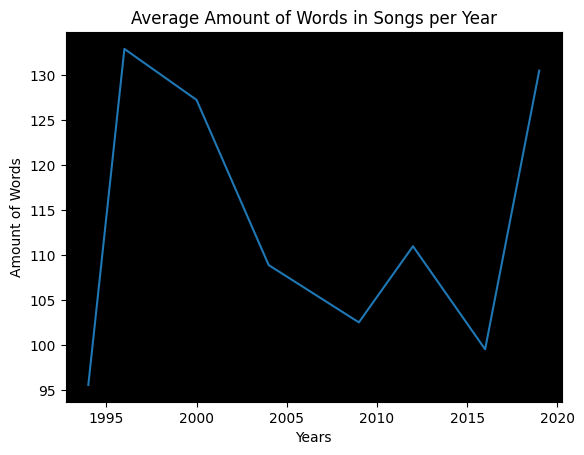

In [204]:
# Plot the average word count for each album
plt.plot(vader_dataframe.groupby(['year'])['wordCount'].mean())
plt.title('Average Amount of Words in Songs per Year')
plt.xlabel('Years')
plt.ylabel('Amount of Words')
ax = plt.gca()
ax.set_facecolor('xkcd:black')

## B2.Sentiment Using Textblob in cleaned_Lyrics 

In [205]:
blob_dataframe_clean=pf

In [206]:
blob_dataframe_clean['sentiment'] = blob_dataframe_clean['CleanedLyrics'].apply(lambda tweet: TextBlob(tweet).sentiment)
blob_dataframe_clean.head(3)

TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'list'>

In [207]:
#turn column into string in order to apply polarity scores
blob_dataframe_clean['new_CleanedLyrics'] = [' '.join(map(str, l)) for l in blob_dataframe_clean['CleanedLyrics']]
blob_dataframe_clean.head(2)

artist                song    album  year  \
0  Nighstalker                 Use  Side FX  1994   
1  Nighstalker  What Your Name Is   Side FX  1994   

                                              lyrics  \
0  There must be something\nThat you want to do a...   
1  How happy you must be right now that you gave ...   

                                       CleanedLyrics  \
0  [there, must, be, something, that, you, want, ...   
1  [how, happy, you, must, be, right, now, that, ...   

                                   new_CleanedLyrics  \
0  there must be something that you want to do ag...   
1  how happy you must be right now that you gave ...   

                                              scores  
0  {'neg': 0.146, 'neu': 0.764, 'pos': 0.09, 'com...  
1  {'neg': 0.136, 'neu': 0.728, 'pos': 0.136, 'co...

In [208]:
from textblob import TextBlob

In [209]:
#processed song TEXTBLOB sentiment analysis
blob_dataframe_clean['sentiment'] = blob_dataframe_clean['new_CleanedLyrics'].apply(lambda tweet: TextBlob(tweet).sentiment)
blob_dataframe_clean.head(3)

artist                song    album  year  \
0  Nighstalker                 Use  Side FX  1994   
1  Nighstalker  What Your Name Is   Side FX  1994   
2  Nighstalker         Funny Paper  Side FX  1994   

                                              lyrics  \
0  There must be something\nThat you want to do a...   
1  How happy you must be right now that you gave ...   
2  You don't know what's right or wrong with it\n...   

                                       CleanedLyrics  \
0  [there, must, be, something, that, you, want, ...   
1  [how, happy, you, must, be, right, now, that, ...   
2  [you, don't, know, what's, right, or, wrong, w...   

                                   new_CleanedLyrics  \
0  there must be something that you want to do ag...   
1  how happy you must be right now that you gave ...   
2  you don't know what's right or wrong with it b...   

                                              scores  \
0  {'neg': 0.146, 'neu': 0.764, 'pos': 0.09, 'com...   
1  {'neg': 0.136, 'neu': 0.728, 'pos': 0.136, 'co...   
2  {'neg': 0.085, 'neu': 0.849, 'pos': 0.066, 'co...   

                                       sentiment  
0                  (0.20249999999999999, 0.3125)  
1     (-0.07155612244897959, 0.6114795918367346)  
2  (-0.00044642857142856984, 0.6839285714285714)

In [210]:
blob_dataframe_clean['polarity']=blob_dataframe_clean['sentiment'].str.get(0)

In [211]:
blob_dataframe_clean['subjectivity']=blob_dataframe_clean['sentiment'].str.get(1)

In [212]:
blob_dataframe_clean['sentiment']=''
blob_dataframe_clean.loc[blob_dataframe_clean.polarity>0,'sentiment']='positive'
blob_dataframe_clean.loc[blob_dataframe_clean.polarity==0,'sentiment']='neutral'
blob_dataframe_clean.loc[blob_dataframe_clean.polarity<0,'sentiment']='negative'

In [213]:
blob_dataframe_clean.sort_values(by='polarity',ascending=False).head(3)

artist                         song               album  year  \
54  Nighstalker                  Zombie Hour  As above, so below  2016   
36  Nighstalker                 Learn to fly          Superfreak  2009   
55  Nighstalker  The Dog That No-one Wanted   As above, so below  2016   

                                               lyrics  \
54  All the zombies\nComing out at night\nAll the ...   
36  A thousand deaths in just one life\nThe smalle...   
55  Forget where you came from\nRunning away from ...   

                                        CleanedLyrics  \
54  [all, the, zombies, coming, out, at, night, al...   
36  [a, thousand, deaths, in, just, one, life, the...   
55  [forget, where, you, came, from, running, away...   

                                    new_CleanedLyrics  \
54  all the zombies coming out at night all the fr...   
36  a thousand deaths in just one life the smalles...   
55  forget where you came from running away from t...   

                                               scores sentiment  polarity  \
54  {'neg': 0.184, 'neu': 0.762, 'pos': 0.054, 'co...  positive  0.850000   
36  {'neg': 0.122, 'neu': 0.708, 'pos': 0.171, 'co...  positive  0.642857   
55  {'neg': 0.111, 'neu': 0.514, 'pos': 0.374, 'co...  positive  0.520000   

    subjectivity  
54          0.85  
36          0.80  
55          0.74

## Vizualizing TextBlob Sentiment

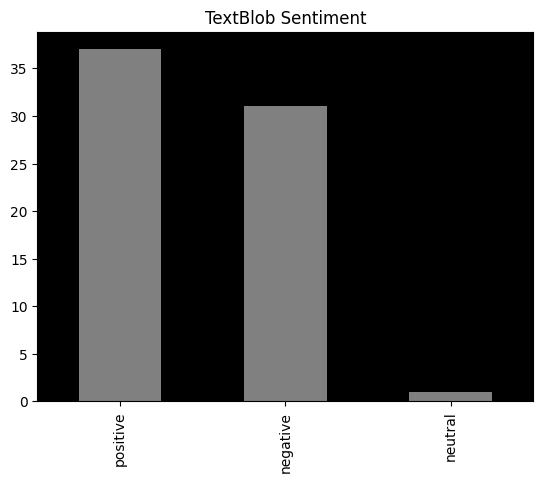

In [214]:
blob_dataframe_clean.sentiment.value_counts().plot(kind='bar',title="TextBlob Sentiment", color='gray')
ax = plt.gca()
ax.set_facecolor('xkcd:black')

## TOP POSITIVE SONGS TEXTBLOB

In [215]:
blob_new=blob_dataframe_clean[['song','album','year','polarity','subjectivity','sentiment']]

In [216]:
blob_new[['song','polarity','sentiment']].sort_values(by='polarity',ascending=False).head(3)

song  polarity sentiment
54                  Zombie Hour  0.850000  positive
36                 Learn to fly  0.642857  positive
55  The Dog That No-one Wanted   0.520000  positive

In [169]:
blob_new.sort_values(by='subjectivity',ascending=True).head(2)

song               album  year  polarity  subjectivity  \
22  Don’t Blow My High         Just a Burn  2004       0.0      0.000000   
59    My Electric Head  As above, so below  2016      -0.1      0.133333   

   sentiment  
22   neutral  
59  negative

## TOP POSITIVE SONGS VADER

In [217]:
vader_dataframe[['song','compound','pos','sentiment']].sort_values(by='pos',ascending=False).head(3)

song  compound    pos sentiment
55  The Dog That No-one Wanted     0.9933  0.374  positive
21                  Just a Burn    0.9879  0.305  positive
34                   Superfreak    0.8943  0.250  positive

In [219]:
vader_dataframe[['song','compound','pos','sentiment']].sort_values(by='compound',ascending=False).head(3)

song  compound    pos sentiment
55  The Dog That No-one Wanted     0.9933  0.374  positive
21                  Just a Burn    0.9879  0.305  positive
13             Tell me about it    0.9844  0.177  positive

## TOP NEGATIVE SONGS SONGS VADER

In [220]:
vader_dataframe[['song','compound','neg']].sort_values(by='neg',ascending=True).head(3)

song  compound    neg
3   Mad Prophet     0.5423  0.000
11     This Is U    0.9834  0.000
66    Half Crazy    0.8680  0.017

In [221]:
vader_dataframe[['song','compound','neg']].sort_values(by='compound',ascending=True).head(3)

song  compound    neg
44          Dead Rock Commandos   -0.9931  0.414
45  One Million Broken Promises   -0.9907  0.294
17                Hide Your Sun   -0.9857  0.213

## TOP NEGATIVE SONGS SONGS TEXTBLOB

In [222]:
blob_new.sort_values(by='polarity',ascending=True).head(3)

song                 album  year  polarity  subjectivity  \
35     The pain goes on            Superfreak  2009 -0.425000      0.875000   
50  The Boogie Man Plan   Dead Rock Commandos  2012 -0.378750      0.708750   
64     Seven out of ten  Great Hallucinations  2019 -0.297034      0.642898   

   sentiment  
35  negative  
50  negative  
64  negative

In [223]:

# Select the most positive songs
train_pos = vader_dataframe[vader_dataframe['compound'] > 0.95]

# Select the most negative songs
train_neg = vader_dataframe[vader_dataframe['compound'] < -0.95]
train_neg.head(2)

artist           song album  year    neg    neu    pos  compound  \
6   Nighstalker            Use   Use  1996  0.231  0.663  0.106   -0.9541   
10  Nighstalker  Trigger Happy   Use  1996  0.226  0.679  0.094   -0.9836   

   sentiment  wordCount                                  new_CleanedLyrics  
6   negative        122  i may be wrong i may be right i feel so strong...  
10  negative        181  don’t need a ring of solid gold now to show me...

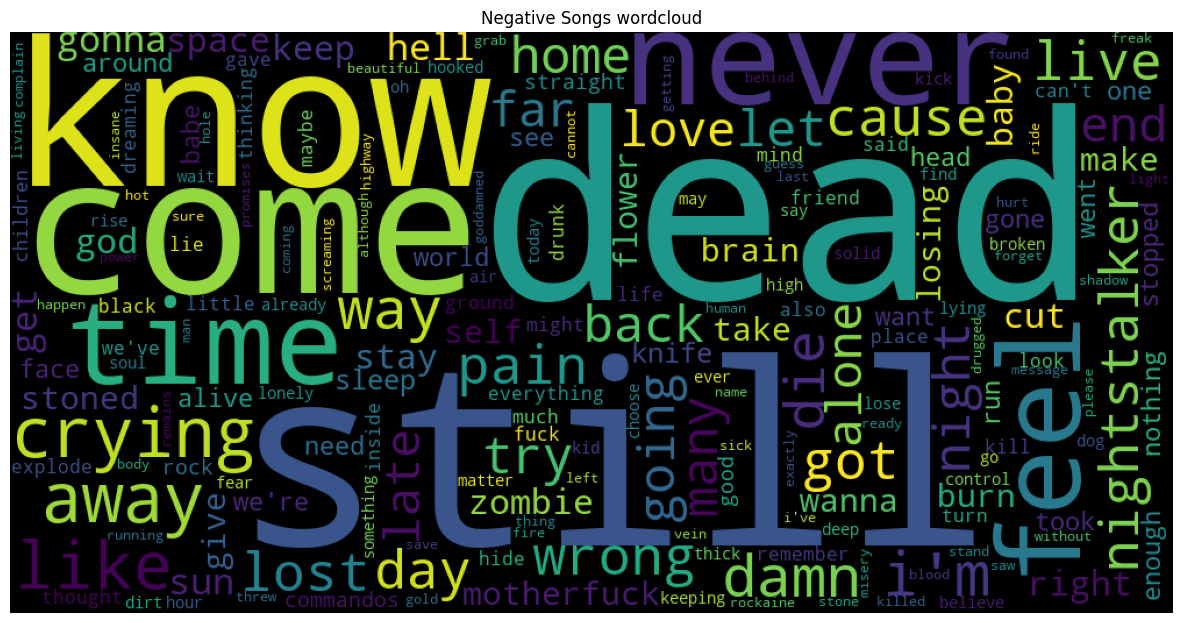

In [224]:

# Create wordcloud for negative song name words
wordcloud_neg = WordCloud(background_color='black',width = 1000, height = 500,collocations=False,random_state=100,stopwords=stop_words).generate(' '.join(train_neg['new_CleanedLyrics']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_neg)
plt.axis("off")
plt.title("Negative Songs wordcloud")
plt.show()


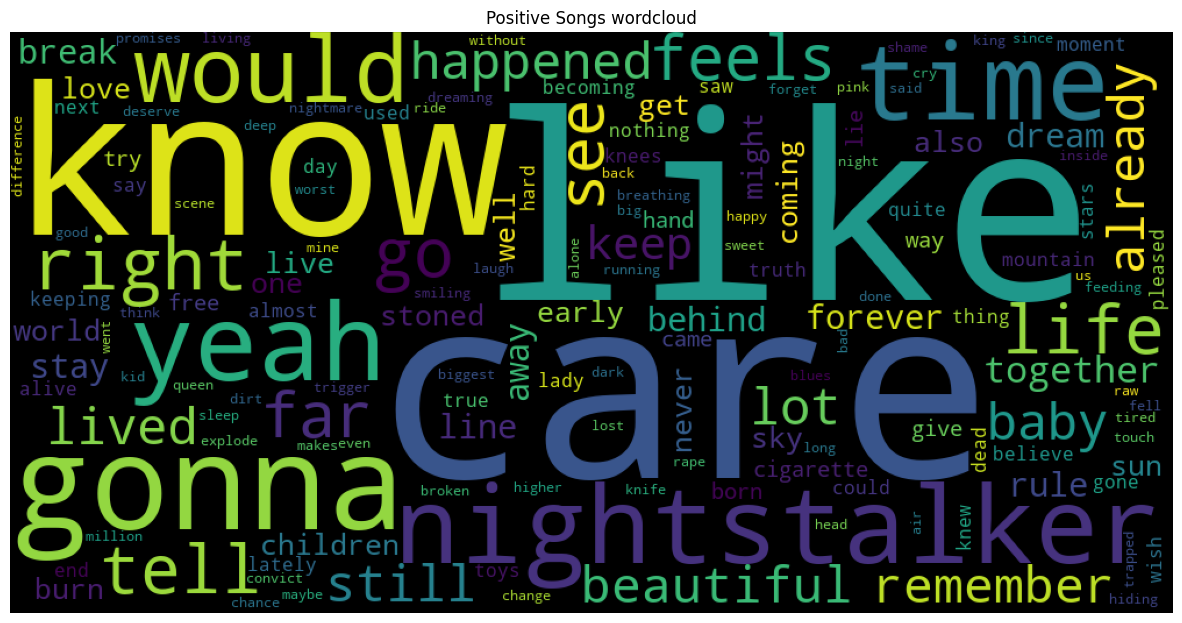

In [225]:
# Create wordcloud for positive song names words
wordcloud_pos = WordCloud(background_color='black', width = 1000, height = 500,collocations=False,random_state=100,stopwords=stop_words).generate(' '.join(train_pos['new_CleanedLyrics']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_pos)
plt.title("Positive Songs wordcloud")
plt.axis("off")
plt.show()

# LIVE SETLIST ANALYSIS

In [236]:
# read an excel file and convert
# into a dataframe object
#live=pd.DataFrame(pd.read_excel("C:/Users/domna/Desktop/GITHUB/python_NLP/liveset.xlsx"))
#live= pd.DataFrame(pd.read_excel("C:/Users/EFKA-PC/Desktop/github1/python_NLP/liveset.xlsx"))
live=pd.DataFrame(pd.read_excel("https://raw.githubusercontent.com/hippoghost/NLP-sentiment_analysis-WordCloud-python/blob/master/datasets/datasets/liveset.xlsx")

live.head(5)

artist                         song                album  year  \
0  Nighstalker                  Go Get Some  Dead Rock Commandos  2012   
1  Nighstalker  One Million Broken Promises  Dead Rock Commandos  2012   
2  Nighstalker                   Superfreak           Superfreak  2009   
3  Nighstalker                         Soma  Dead Rock Commandos  2012   
4  Nighstalker                  Zombie Hour   As above, so below  2016   

                                              lyrics  
0  I took a ride to the other side\nThe other sid...  
1  One million promises\nI don’t know where they ...  
2  I was old when I was too young\nI was wrong wh...  
3  Get up, try to find it\nGrab it, time to hide ...  
4  All the zombies\nComing out at night\nAll the ...

In [237]:
# Make sure the lyrics are string
live['lyrics'] = live['lyrics'].astype(str)

# Put the lyrics into a new column CleanedLyrics
live['CleanedLyrics'] = live['lyrics'].str.lower().str.split()

# Remove all stopwords from the lyrics 
#live['CleanedLyrics'] = live['CleanedLyrics'].apply(lambda x: [item for item in x if item not in stop_words])
live.head(2)

artist                         song                album  year  \
0  Nighstalker                  Go Get Some  Dead Rock Commandos  2012   
1  Nighstalker  One Million Broken Promises  Dead Rock Commandos  2012   

                                              lyrics  \
0  I took a ride to the other side\nThe other sid...   
1  One million promises\nI don’t know where they ...   

                                       CleanedLyrics  
0  [i, took, a, ride, to, the, other, side, the, ...  
1  [one, million, promises, i, don’t, know, where...

In [238]:
#turn column into string in order to apply polarity scores
live['new_CleanedLyrics'] = [' '.join(map(str, l)) for l in live['CleanedLyrics']]
live.head(2)

artist                         song                album  year  \
0  Nighstalker                  Go Get Some  Dead Rock Commandos  2012   
1  Nighstalker  One Million Broken Promises  Dead Rock Commandos  2012   

                                              lyrics  \
0  I took a ride to the other side\nThe other sid...   
1  One million promises\nI don’t know where they ...   

                                       CleanedLyrics  \
0  [i, took, a, ride, to, the, other, side, the, ...   
1  [one, million, promises, i, don’t, know, where...   

                                   new_CleanedLyrics  
0  i took a ride to the other side the other side...  
1  one million promises i don’t know where they w...

In [239]:
#processed song VADER sentiment analysis
vader_live=live
sid = SentimentIntensityAnalyzer()
vader_live['scores'] = vader_live['new_CleanedLyrics'].apply(lambda new_CleanedLyrics: sid.polarity_scores(new_CleanedLyrics))

In [240]:

z=vader_live['scores']
z= pd.DataFrame(list(z))
vader_live = vader_live.join(z)

In [241]:
vader_live['compound'] = vader_live['scores'].apply(lambda score_dict: score_dict['compound'])
vader_live['sentiment']=''
vader_live.loc[vader_live.compound>0,'sentiment']='positive'
vader_live.loc[vader_live.compound==0,'sentiment']='neutral'
vader_live.loc[vader_live.compound<0,'sentiment']='negative'
vader_live.head(1)


artist         song                album  year  \
0  Nighstalker  Go Get Some  Dead Rock Commandos  2012   

                                              lyrics  \
0  I took a ride to the other side\nThe other sid...   

                                       CleanedLyrics  \
0  [i, took, a, ride, to, the, other, side, the, ...   

                                   new_CleanedLyrics  \
0  i took a ride to the other side the other side...   

                                              scores    neg    neu    pos  \
0  {'neg': 0.158, 'neu': 0.799, 'pos': 0.043, 'co...  0.158  0.799  0.043   

   compound sentiment  
0   -0.9421  negative

In [252]:
vader_live

artist                         song                 album  year  \
0   Nighstalker                  Go Get Some   Dead Rock Commandos  2012   
1   Nighstalker  One Million Broken Promises   Dead Rock Commandos  2012   
2   Nighstalker                   Superfreak            Superfreak  2009   
3   Nighstalker                         Soma   Dead Rock Commandos  2012   
4   Nighstalker                  Zombie Hour    As above, so below  2016   
5   Nighstalker               Forever Stoned    As above, so below  2016   
6   Nighstalker                  Just a Burn           Just a Burn  2004   
7   Nighstalker     Never Know (Supersonic)             The Ritual  2000   
8   Nighstalker                     Keystone   Dead Rock Commandos  2012   
9   Nighstalker  The Dog That No-one Wanted     As above, so below  2016   
10  Nighstalker                 Back to Dirt   Dead Rock Commandos  2012   
11  Nighstalker                     Rockaine   Dead Rock Commandos  2012   
12  Nighstalker          The Boogie Man Plan   Dead Rock Commandos  2012   
13  Nighstalker                 The Underdog   Dead Rock Commandos  2012   
14  Nighstalker                  Sweet Knife  Great Hallucinations  2019   
15  Nighstalker             Baby God is Dead            Superfreak  2009   
16  Nighstalker                Trigger Happy                   Use  1996   
17  Nighstalker         Great Hallucinations  Great Hallucinations  2019   
18  Nighstalker          Dead Rock Commandos   Dead Rock Commandos  2012   
19  Nighstalker          Children of the Sun   Dead Rock Commandos  2012   

                                               lyrics  \
0   I took a ride to the other side\nThe other sid...   
1   One million promises\nI don’t know where they ...   
2   I was old when I was too young\nI was wrong wh...   
3   Get up, try to find it\nGrab it, time to hide ...   
4   All the zombies\nComing out at night\nAll the ...   
5   I'm in a mood to do something bad\nI don't kno...   
6   I don’t know if I’m alive or dead\nI don’t kno...   
7   I killed myself the day that I stopped dreamin...   
8   I know, it’s only rock ‘n roll\nEverything I n...   
9   Forget where you came from\nRunning away from ...   
10  Welcome back to earth motherfucker\nTry to kee...   
11  When I see the black smoke from the rubble of ...   
12  I’m afraid of the dark at night\nI’m afraid I’...   
13  Exploding in a thousand pieces\nComing back fr...   
14  Don't try to get back to me, I'm so far away\n...   
15  Baby, God is dead\nHe had an overdose\nHe went...   
16  Don’t need a ring of solid gold now\nTo show m...   
17  Maybe it's time to die\nMaybe not today\nHow m...   
18  Dead rock commandos\nAll over the space\nSeeki...   
19  Lie or truth\nI’m keeping all my love for you ...   

                                        CleanedLyrics  \
0   [i, took, a, ride, to, the, other, side, the, ...   
1   [one, million, promises, i, don’t, know, where...   
2   [i, was, old, when, i, was, too, young, i, was...   
3   [get, up,, try, to, find, it, grab, it,, time,...   
4   [all, the, zombies, coming, out, at, night, al...   
5   [i'm, in, a, mood, to, do, something, bad, i, ...   
6   [i, don’t, know, if, i’m, alive, or, dead, i, ...   
7   [i, killed, myself, the, day, that, i, stopped...   
8   [i, know,, it’s, only, rock, ‘n, roll, everyth...   
9   [forget, where, you, came, from, running, away...   
10  [welcome, back, to, earth, motherfucker, try, ...   
11  [when, i, see, the, black, smoke, from, the, r...   
12  [i’m, afraid, of, the, dark, at, night, i’m, a...   
13  [exploding, in, a, thousand, pieces, coming, b...   
14  [don't, try, to, get, back, to, me,, i'm, so, ...   
15  [baby,, god, is, dead, he, had, an, overdose, ...   
16  [don’t, need, a, ring, of, solid, gold, now, t...   
17  [maybe, it's, time, to, die, maybe, not, today...   
18  [dead, rock, commandos, all, over, the, space,...   
19  [lie, or, truth, i’m, keeping, all, my, love, ...   

                

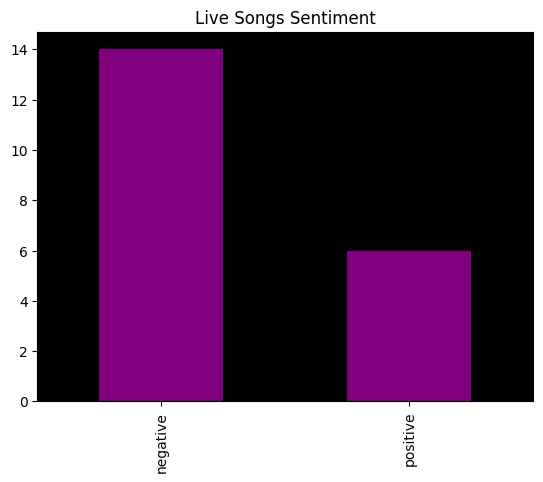

In [242]:
vader_live.sentiment.value_counts().plot(kind='bar',title="Live Songs Sentiment",color="purple")
ax = plt.gca()
ax.set_facecolor('xkcd:black')

In [250]:
vader_live[['song','album','year','compound','sentiment','pos']].sort_values(by='compound',ascending=False).head(3)

song                album  year  compound  \
9   The Dog That No-one Wanted    As above, so below  2016    0.9933   
6                   Just a Burn          Just a Burn  2004    0.9879   
19          Children of the Sun  Dead Rock Commandos  2012    0.9648   

   sentiment    pos  
9   positive  0.374  
6   positive  0.305  
19  positive  0.139

In [244]:
blob_live=live

In [245]:
#processed song TEXTBLOB sentiment analysis
blob_live['sentiment'] = blob_live['new_CleanedLyrics'].apply(lambda tweet: TextBlob(tweet).sentiment)
blob_live.head(3)

artist                         song                album  year  \
0  Nighstalker                  Go Get Some  Dead Rock Commandos  2012   
1  Nighstalker  One Million Broken Promises  Dead Rock Commandos  2012   
2  Nighstalker                   Superfreak           Superfreak  2009   

                                              lyrics  \
0  I took a ride to the other side\nThe other sid...   
1  One million promises\nI don’t know where they ...   
2  I was old when I was too young\nI was wrong wh...   

                                       CleanedLyrics  \
0  [i, took, a, ride, to, the, other, side, the, ...   
1  [one, million, promises, i, don’t, know, where...   
2  [i, was, old, when, i, was, too, young, i, was...   

                                   new_CleanedLyrics  \
0  i took a ride to the other side the other side...   
1  one million promises i don’t know where they w...   
2  i was old when i was too young i was wrong whe...   

                                              scores  \
0  {'neg': 0.158, 'neu': 0.799, 'pos': 0.043, 'co...   
1  {'neg': 0.294, 'neu': 0.674, 'pos': 0.032, 'co...   
2  {'neg': 0.151, 'neu': 0.599, 'pos': 0.25, 'com...   

                                   sentiment  
0  (0.18333333333333335, 0.3833333333333333)  
1  (-0.0857142857142857, 0.8267857142857145)  
2   (0.1805194805194805, 0.5456709956709956)

In [246]:
blob_live['polarity']=blob_live['sentiment'].str.get(0)
blob_live['subjectivity']=blob_live['sentiment'].str.get(1)
blob_live['sentiment']=''
blob_live.loc[blob_live.polarity>0,'sentiment']='positive'
blob_live.loc[blob_live.polarity==0,'sentiment']='neutral'
blob_live.loc[blob_live.polarity<0,'sentiment']='negative'
blob_live.sort_values(by='polarity',ascending=False).head(3)

artist                         song                 album  year  \
4   Nighstalker                  Zombie Hour    As above, so below  2016   
9   Nighstalker  The Dog That No-one Wanted     As above, so below  2016   
17  Nighstalker         Great Hallucinations  Great Hallucinations  2019   

                                               lyrics  \
4   All the zombies\nComing out at night\nAll the ...   
9   Forget where you came from\nRunning away from ...   
17  Maybe it's time to die\nMaybe not today\nHow m...   

                                        CleanedLyrics  \
4   [all, the, zombies, coming, out, at, night, al...   
9   [forget, where, you, came, from, running, away...   
17  [maybe, it's, time, to, die, maybe, not, today...   

                                    new_CleanedLyrics  \
4   all the zombies coming out at night all the fr...   
9   forget where you came from running away from t...   
17  maybe it's time to die maybe not today how man...   

                                               scores sentiment  polarity  \
4   {'neg': 0.184, 'neu': 0.762, 'pos': 0.054, 'co...  positive  0.850000   
9   {'neg': 0.111, 'neu': 0.514, 'pos': 0.374, 'co...  positive  0.520000   
17  {'neg': 0.219, 'neu': 0.74, 'pos': 0.041, 'com...  positive  0.290783   

    subjectivity  
4       0.850000  
9       0.740000  
17      0.536111

In [251]:
blob_live.sort_values(by='polarity',ascending=False).head(3)

artist                         song                 album  year  \
4   Nighstalker                  Zombie Hour    As above, so below  2016   
9   Nighstalker  The Dog That No-one Wanted     As above, so below  2016   
17  Nighstalker         Great Hallucinations  Great Hallucinations  2019   

                                               lyrics  \
4   All the zombies\nComing out at night\nAll the ...   
9   Forget where you came from\nRunning away from ...   
17  Maybe it's time to die\nMaybe not today\nHow m...   

                                        CleanedLyrics  \
4   [all, the, zombies, coming, out, at, night, al...   
9   [forget, where, you, came, from, running, away...   
17  [maybe, it's, time, to, die, maybe, not, today...   

                                    new_CleanedLyrics  \
4   all the zombies coming out at night all the fr...   
9   forget where you came from running away from t...   
17  maybe it's time to die maybe not today how man...   

                                               scores sentiment  polarity  \
4   {'neg': 0.184, 'neu': 0.762, 'pos': 0.054, 'co...  positive  0.850000   
9   {'neg': 0.111, 'neu': 0.514, 'pos': 0.374, 'co...  positive  0.520000   
17  {'neg': 0.219, 'neu': 0.74, 'pos': 0.041, 'com...  positive  0.290783   

    subjectivity  
4       0.850000  
9       0.740000  
17      0.536111